In [17]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


In [18]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/cru/cru_ts4.06.1901.2021.pre.dat.nc')
 

data

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 1452)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2021-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.06 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2205201912. Data generated from:pre.2204291209.dtb
    history:      Fri 20 May 21:52:05 BST 2022 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [19]:
#data.variables


In [20]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1980-01-16T12:00:00.000000000','2015-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 431)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1980-02-15 1980-03-16 ... 2015-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.06 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2205201912. Data generated from:pre.2204291209.dtb
    history:      Fri 20 May 21:52:05 BST 2022 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [21]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 144)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1980-06-16 1980-07-16 ... 2015-09-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.06 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2205201912. Data generated from:pre.2204291209.dtb
    history:      Fri 20 May 21:52:05 BST 2022 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [22]:
#to select the x and y coordinates
jjas_data = jjas_data.sel(lon=slice(85,96),lat=slice(18,29))
jjas_data

<xarray.Dataset>
Dimensions:  (lon: 22, lat: 22, time: 144)
Coordinates:
  * lon      (lon) float32 85.25 85.75 86.25 86.75 ... 94.25 94.75 95.25 95.75
  * lat      (lat) float32 18.25 18.75 19.25 19.75 ... 27.25 27.75 28.25 28.75
  * time     (time) datetime64[ns] 1980-06-16 1980-07-16 ... 2015-09-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.06 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2205201912. Data generated from:pre.2204291209.dtb
    history:      Fri 20 May 21:52:05 BST 2022 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [23]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pre.mean('time')
 
jjas_mean 

<xarray.DataArray 'pre' (lat: 22, lon: 22)>
array([[        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan, 1034.6515  ,  775.7047  ,
         567.8445  ,  459.40826 ],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,  970.71735 ,  954.46246 ,  706.0424  ,
         436.22437 ,  377.15414 ],
       [ 210.31253 ,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,  877.9054  ,  795.74817 ,  610.2514  ,
         410.73526 ,  331.86877 ],
       [ 233.51044 ,  254.16315 ,  277.49377 ,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,  838.787   ,  777.1486  ,  673.3811  ,  528.67017 ,
         379.309   ,  287.37512 ],
...
       [ 394.49106 ,  357.5507  ,  311.65414 ,  370.85568 ,  409.8978  ,
         445.82367 ,  480.15137 ,  491.53278 ,  424.8117  ,  465.67584 ,
         506.3611  ,  469.05002 ,  422.99585 ,  294.42294 ,  227.77773 ,
         261.24786 ,  245.58821 ,  336.3438  ,  435.31946 ,  404.5549  ,
         401.0619  ,  361.26044 ],
       [ 393.6672  ,  396.11728 ,  268.32498 ,  134.91046 ,  226.42015 ,
         144.15    ,   99.29515 ,  139.73196 ,   87.101395,  258.51804 ,
         199.36388 ,  174.93124 ,  231.5514  ,  143.13126 ,  100.15139 ,
         141.65282 ,  196.62294 ,  257.96466 ,  340.24655 ,  385.6369  ,
         394.65125 ,  365.109   ],
       [ 156.01459 ,   45.50694 ,   36.967365,   34.52291 ,   49.522915,
          51.65069 ,   52.630554,   36.815968,   41.601387,   49.157635,
          52.256252,   64.30278 ,   72.08334 ,   59.42014 ,   60.440964,
          71.535385,  129.05139 ,  184.83893 ,  231.33195 ,  314.77997 ,
         301.82294 ,  292.72098 ],
       [  34.581947,   31.837494,   33.7132  ,   37.455563,   38.499996,
          44.835415,   36.288895,   36.14515 ,   36.405567,   38.515965,
          38.106247,   48.795837,   47.681244,   47.85    ,   51.85487 ,
          61.334026,   75.93472 ,   96.22846 ,  136.584   ,  229.94524 ,
         184.72221 ,  186.31526 ]], dtype=float32)
Coordinates:
  * lon      (lon) float32 85.25 85.75 86.25 86.75 ... 94.25 94.75 95.25 95.75
  * lat      (lat) float32 18.25 18.75 19.25 19.75 ... 27.25 27.75 28.25 28.75

In [24]:
#the data is in mm/month.so we need to devide it by 30.4169 (average of 12 months)

pr_mm = jjas_mean/30.4167
pr_mm

<xarray.DataArray 'pre' (lat: 22, lon: 22)>
array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan, 34.015903 , 25.502592 ,
        18.668839 , 15.103817 ],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan, 31.91396  , 31.379553 , 23.212328 ,
        14.341607 , 12.399574 ],
       [ 6.9143767,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan, 28.862612 , 26.161554 , 20.063038 ,
        13.50361  , 10.910742 ],
       [ 7.677047 ,  8.356039 ,  9.123073 ,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan, 27.576529 , 25.550064 , 22.138533 , 17.380919 ,
        12.470419 ,  9.447939 ],
...
       [12.969555 , 11.755078 , 10.246152 , 12.192502 , 13.476077 ,
        14.6572   , 15.785781 , 16.159964 , 13.966396 , 15.309874 ,
        16.64747  , 15.420805 , 13.906697 ,  9.679647 ,  7.4885745,
         8.588962 ,  8.074124 , 11.057866 , 14.311856 , 13.300421 ,
        13.185582 , 11.877043 ],
       [12.94247  , 13.02302  ,  8.821633 ,  4.4354076,  7.443942 ,
         4.7391725,  3.2644944,  4.5939226,  2.8636043,  8.499213 ,
         6.5544214,  5.7511578,  7.6126404,  4.70568  ,  3.2926447,
         4.657074 ,  6.4643087,  8.481021 , 11.186175 , 12.678459 ,
        12.974821 , 12.003571 ],
       [ 5.129241 ,  1.4961169,  1.2153641,  1.1349986,  1.6281488,
         1.698103 ,  1.7303177,  1.2103866,  1.3677154,  1.6161397,
         1.7180119,  2.1140616,  2.3698606,  1.9535366,  1.987098 ,
         2.3518457,  4.2427807,  6.0768895,  7.605426 , 10.348919 ,
         9.922935 ,  9.6236925],
       [ 1.1369395,  1.046711 ,  1.1083779,  1.2314144,  1.2657518,
         1.4740394,  1.1930583,  1.1883323,  1.196894 ,  1.2662768,
         1.2528068,  1.604245 ,  1.5676008,  1.5731488,  1.7048157,
         2.016459 ,  2.4964812,  3.163672 ,  4.490428 ,  7.559835 ,
         6.0730524,  6.1254263]], dtype=float32)
Coordinates:
  * lon      (lon) float32 85.25 85.75 86.25 86.75 ... 94.25 94.75 95.25 95.75
  * lat      (lat) float32 18.25 18.75 19.25 19.75 ... 27.25 27.75 28.25 28.75

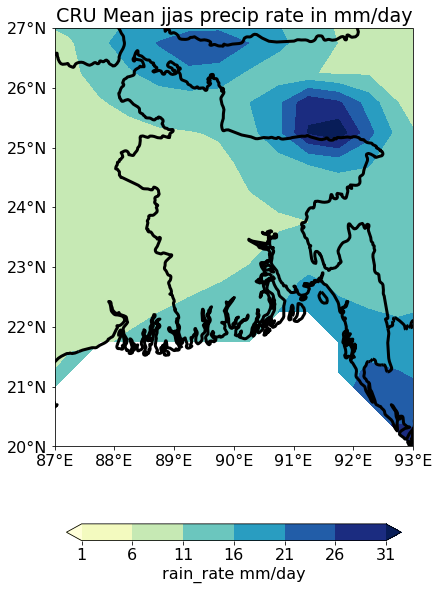

In [32]:
#plotting with cartopy jjas_pr_mean
import cartopy.feature as cfeature

plt.rcParams['font.size'] = '16'


scale = '110m'

fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


 
m1 = ax.contourf(pr_mm['lon'][:], pr_mm['lat'][:],pr_mm,
                 levels=np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')




# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)




plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'rain_rate mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)

#ax.add_feature(cfeature.STATES)
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.LAKES)
#ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.RIVERS)


#ax.add_feature(cfeature.LAND.with_scale(scale))
#ax.add_feature(cfeature.OCEAN.with_scale(scale))
#ax.add_feature(cfeature.STATES.with_scale(scale))
#ax.add_feature(cfeature.LAKES.with_scale(scale), alpha=0.5)
#ax.add_feature(cfeature.COASTLINE.with_scale(scale))




#state_borders = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m')#, facecolor='#FFE9B5')
#ax.add_feature(state_borders, edgecolor='black')

 
#ax.coastlines(resolution="110m",linewidth=5)
#ax.gridlines(linestyle='--',color='black')


plt.title('CRU Mean jjas precip rate in mm/day')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_cru4_jjas_mean.png")





In [26]:
annual_mean = data.pre.mean('time')
annual_mean

<xarray.DataArray 'pre' (lat: 360, lon: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75

In [27]:
#converting from mm/month to mm/day

annual_pr_mm = annual_mean/30.4167
annual_pr_mm

<xarray.DataArray 'pre' (lat: 360, lon: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75

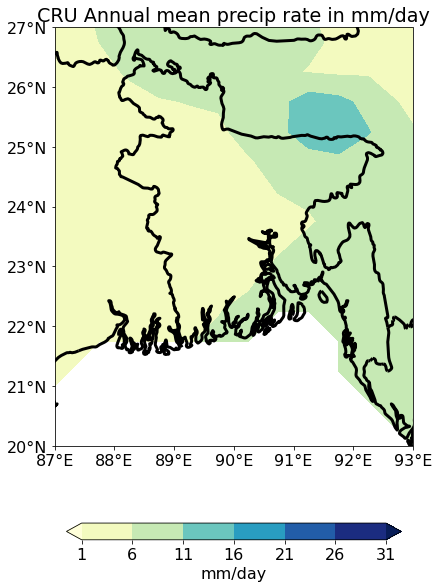

In [33]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(annual_pr_mm['lon'], annual_pr_mm['lat'],annual_pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)


plt.title('CRU Annual mean precip rate in mm/day')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_cru4_annual_mean.png")





/home/mkibria/miniconda3/envs/esp-sp/lib/python3.9/site-packages/xarray/plot/plot.py:1451: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(x.dtype, str)
/home/mkibria/miniconda3/envs/esp-sp/lib/python3.9/site-packages/xarray/plot/plot.py:1466: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(y.dtype, str)


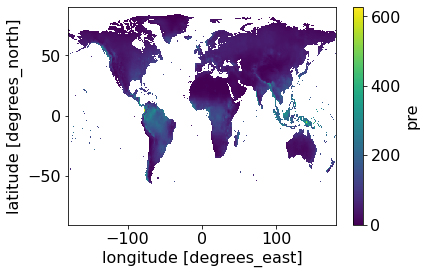

In [29]:
x=data['time.month']

y=np.empty_like(annual_mean)
k=data['pre.values']
z=np.vectorize(y)
annual_mean.plot()


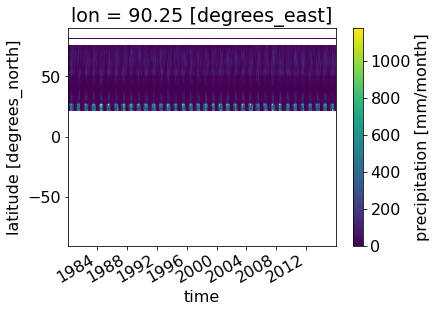

In [30]:
pr=data.pre
pr.sel(lon=90.25).transpose().plot()


In [31]:
data[var].isel(time=0).plot.contourf(x="lon", y="lat", cmap="PRGn", cbar_kwargs={"label": "m/s"})










NameError: name 'var' is not defined

In [ ]:

pr.sel(lon=90.25, lat=22.25).plot()  
    


In [ ]:
#annual_mean.lon.values

#to select the x and y coordinates
annual_mean = annual_mean.sel(lon=slice(85,96),lat=slice(18,29))

pre=annual_mean.sel(lon=90.25, lat=22.25) 

pre.plot()

In [ ]:
month = data['time.month']


sst_time_and_zonal_mean = data.pre.mean(dim=('lat', 'lon'))
sst_time_and_zonal_mean.plot(x='time')

In [ ]:
pre_clim = data.pre.groupby('time.month').mean(dim=('lat','lon'))
#pre_clim = data.pre.groupby('time.month').mean(dim='time')
#pre_clim
pre_clim.plot()


In [ ]:
(pre_clim[6] - pre_clim[0]).plot()
plt.title('June minus July precipitation Climatology')



In [16]:
pre_clim[5]

NameError: name 'pre_clim' is not defined

(array([7.4472e+05, 5.8403e+04, 5.1270e+03, 5.2800e+02, 1.5800e+02,
        6.0000e+01, 3.0000e+01, 1.0000e+01, 2.0000e+00, 2.0000e+00]),
 array([   0.     ,  182.54057,  365.08115,  547.6217 ,  730.1623 ,
         912.7029 , 1095.2434 , 1277.784  , 1460.3246 , 1642.8652 ,
        1825.4058 ], dtype=float32),
 <BarContainer object of 10 artists>)

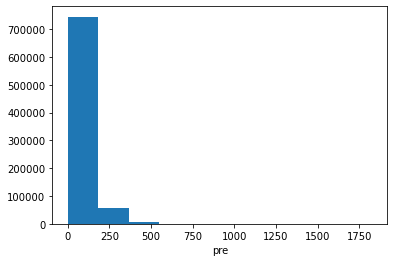

In [17]:
pre_clim = data.pre.groupby('time.month').mean(dim='time')
pre_clim.plot()

In [18]:
time=pre_clim.month
time

<xarray.DataArray 'month' (month: 12)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

ValueError: x and y must have same first dimension, but have shapes (12,) and (360, 720)

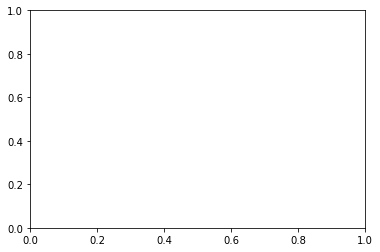

In [19]:
plt.plot(time,annual_mean)
plt.show()